<a href="https://colab.research.google.com/github/Stalkover/food-10/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy
from matplotlib import pyplot as plt

2023-02-20 14:43:30.449625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 14:43:30.558748: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-20 14:43:30.558763: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 14:43:31.086457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
os.chdir('/home/user/tensorflow')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    'food-10c/train/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    'food-10c/val/',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import regularizers

In [4]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [5]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers[:-5]:
    layer.trainable = False


2023-02-20 14:43:32.107626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-20 14:43:32.107653: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-20 14:43:32.107673: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user-desktop): /proc/driver/nvidia/version does not exist
2023-02-20 14:43:32.107925: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model = tf.keras.Sequential()
model.add(base_model),
model.add(tf.keras.layers.GlobalAveragePooling2D()),
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))),
model.add(Dropout(0.5)),
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,423,242
Trainable params: 885,258
Non-tr

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    model.fit(
    train_generator,
    epochs=30,
    batch_size=batch_size,
    callbacks=[early_stopping, history],
    validation_data=val_generator

)

Epoch 1/30
250/250 [==============================] - 119s 466ms/step - loss: 2.2447 - accuracy: 0.6733 - val_loss: 6.2705 - val_accuracy: 0.4325
Epoch 2/30
250/250 [==============================] - 117s 469ms/step - loss: 1.1523 - accuracy: 0.7477 - val_loss: 5.9849 - val_accuracy: 0.4495
Epoch 3/30
250/250 [==============================] - 117s 469ms/step - loss: 0.9414 - accuracy: 0.7655 - val_loss: 8.0157 - val_accuracy: 0.3755
Epoch 4/30
250/250 [==============================] - 115s 461ms/step - loss: 0.8622 - accuracy: 0.7739 - val_loss: 5.9912 - val_accuracy: 0.3950
Epoch 5/30
250/250 [==============================] - 117s 466ms/step - loss: 0.8011 - accuracy: 0.7886 - val_loss: 4.7810 - val_accuracy: 0.5040
Epoch 6/30
250/250 [==============================] - 117s 468ms/step - loss: 0.7850 - accuracy: 0.7950 - val_loss: 4.6461 - val_accuracy: 0.5070
Epoch 7/30
250/250 [==============================] - 116s 462ms/step - loss: 0.7410 - accuracy: 0.8037 - val_loss: 4.8922 -

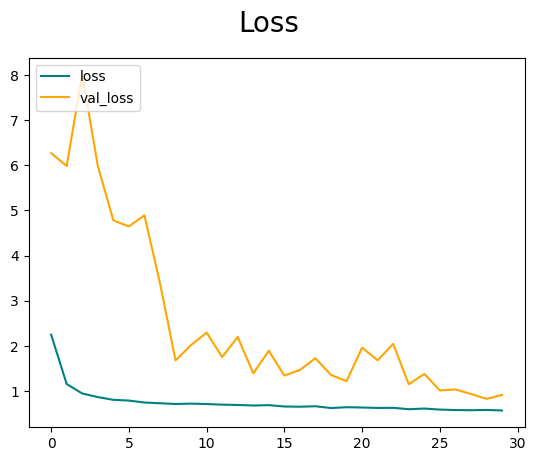

In [9]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

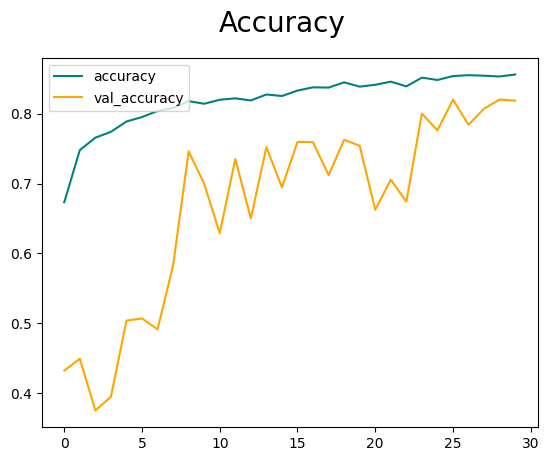

In [10]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [15]:
optimizer = tf.keras.optimizers.Adam(lr=1e-5)
checkpoint = tf.train.Checkpoint(model=model, optimizer=optimizer)
checkpoint_path = 'checkpoint/h5'
checkpoint.save(checkpoint_path)

'checkpoint/h5-1'

In [16]:
latest_checkpoint = tf.train.latest_checkpoint(checkpoint_path)
checkpoint.restore(latest_checkpoint)

In [17]:
model.save('my_model.h5')